# Questão 1

## 1. a) - Avalie a correlação entre as variáveis e destaque os pares que apresentam maior correlação.



In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:

ta=pd.read_csv('textura-alimento.csv',index_col=0)
print(ta.shape)
ta.head()

(50, 5)


,Óleo,Densidade,Crocância,Fratura,Dureza
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


In [3]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, B110 to B998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Óleo       50 non-null     float64
 1   Densidade  50 non-null     int64  
 2   Crocância  50 non-null     int64  
 3   Fratura    50 non-null     int64  
 4   Dureza     50 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 2.3+ KB


In [4]:
ta.duplicated().sum()

0

In [5]:
ta.describe()

,Óleo,Densidade,Crocância,Fratura,Dureza
count,50.000000,50.00000,50.000000,50.000000,50.000000
mean,17.202000,2857.60000,11.520000,20.860000,128.180000
std,1.592007,124.49998,1.775571,5.466073,31.127578
min,13.700000,2570.00000,7.000000,9.000000,63.000000
25%,16.300000,2772.50000,10.000000,17.000000,107.250000
50%,16.900000,2867.50000,12.000000,21.000000,126.000000
75%,18.100000,2945.00000,13.000000,25.000000,143.750000
max,21.200000,3125.00000,15.000000,33.000000,192.000000


### Não existem duplicadas e valores nulos! E todas as variaveis estão no formato correto!

### Correlação Calculada com .corr() do pandas que usa a correlação de pearson, uma maneira de deixar mais legivel e interpretavel é usando um mapa de calor, usarei o do seaborn como exemplo.

In [6]:
corr=ta.corr()
corr

,Óleo,Densidade,Crocância,Fratura,Dureza
Óleo,1.000000,-0.750024,0.593086,-0.533739,-0.096045
Densidade,-0.750024,1.000000,-0.670946,0.572132,0.107937
Crocância,0.593086,-0.670946,1.000000,-0.843965,0.411093
Fratura,-0.533739,0.572132,-0.843965,1.000000,-0.373358
Dureza,-0.096045,0.107937,0.411093,-0.373358,1.000000


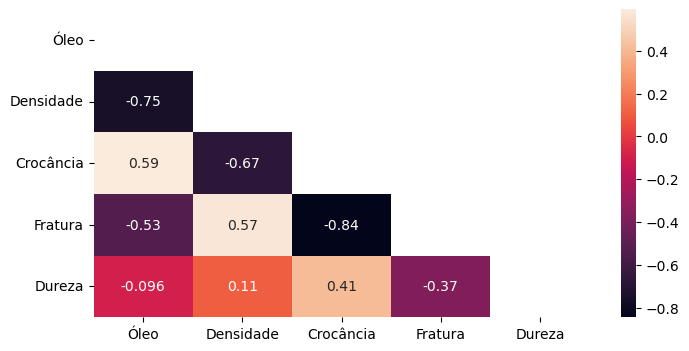

In [7]:
# Aplicamos umas "Mask" (mascara) para retirar valores repetidos

plt.figure(figsize=(8, 4))  
mascara=np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mascara)    
plt.show()

### Como pode ser visto, existe uma relação Linear forte Negativa entre:

### <b>Crocância e Fratura : -0.84 

### <b>Óleo e Densidade : -0.75
### <b> Densidade e Crocância : -0.67

## Porém a correlação de Pearson apenas destaca uma correlação Linear! Caso seja do interesse seria necessario usar outras correlações e ir mais a fundo na analise dos dados.


### 1.B) Sabendo que se busca construir um modelo que preveja a variável de Crocância. Separe os dados em um grupo de validação e um grupo de calibração. Construa um modelo de regressão linear, com o grupo de calibração, para as seguintes combinações de variáveis. 

### Indique e compare os valores dos coeficientes, erro padrão, variância explicada (R2) e a capacidade de previsão de dados no grupo de validação.

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Divisão teste e treino (validação e calibração)

In [9]:
ta_treino, ta_teste = train_test_split(ta, test_size=0.5, random_state=42)

### Depois do Split entre teste e treino, irémos realizar a modelagem matematica a partir das variaveis citadas abaixo, tendo como target a "Crocância".

In [10]:
def modelos(coluna):
    
    if isinstance(coluna, str):
        coluna = [coluna]
    
    colunas_formula = ' + '.join(coluna)

    formula=f'Crocância ~ {colunas_formula}'
    model = smf.ols(formula,data=ta_treino).fit()
    
    coeficientes = model.params
    print("Coeficientes:")
    print(coeficientes)
    
    # Erros padrão dos coeficientes
    erro_padrao = model.bse
    print("\nErro padrão dos coeficientes:")
    print(erro_padrao)
    
    # Variância explicada (R^2) no conjunto de treino
    r2_treino = model.rsquared
    print("\nR² (variância explicada) no conjunto de treino:", r2_treino)
    
    # R² no conjunto de teste - capacidade de previsão
    previsoes = model.predict(ta_teste)
    r2 = r2_score(ta_teste['Crocância'], previsoes)

    print(f'O R² no conjunto de teste é: {r2}')


# Modelos

Indique e compare os valores dos coeficientes, erro padrão, variância explicada (R2) e a capacidade de previsão de dados no grupo de validação.

### 1) Crocância em função da Densidade

In [11]:
modelos('Densidade')

Coeficientes:
Intercept    35.829094
Densidade    -0.008653
dtype: float64

Erro padrão dos coeficientes:
Intercept    6.024857
Densidade    0.002125
dtype: float64

R² (variância explicada) no conjunto de treino: 0.4189350119083617
O R² no conjunto de teste é: 0.34757070247743305


### 2) Crocância em função do Óleo

In [12]:
modelos('Óleo')

Coeficientes:
Intercept   -0.755712
Óleo         0.699474
dtype: float64

Erro padrão dos coeficientes:
Intercept    3.203338
Óleo         0.184837
dtype: float64

R² (variância explicada) no conjunto de treino: 0.3837199341064287
O R² no conjunto de teste é: 0.2659087243440609


### 3) Crocância em função da Fratura

In [13]:
modelos('Fratura')

Coeficientes:
Intercept    17.228992
Fratura      -0.288525
dtype: float64

Erro padrão dos coeficientes:
Intercept    0.802111
Fratura      0.038039
dtype: float64

R² (variância explicada) no conjunto de treino: 0.7143979732312096
O R² no conjunto de teste é: 0.6385472097361173


### 4) Crocância em função do Óleo e da Densidade

In [14]:
modelos(['Óleo','Densidade'])

Coeficientes:
Intercept    21.224293
Óleo          0.342426
Densidade    -0.005584
dtype: float64

Erro padrão dos coeficientes:
Intercept    13.007599
Óleo          0.271219
Densidade     0.003211
dtype: float64

R² (variância explicada) no conjunto de treino: 0.4581919963145371
O R² no conjunto de teste é: 0.3689683277641971


### 5) Crocância em função da Densidade, Óleo e Fratura

In [15]:
modelos(['Óleo','Densidade','Fratura'])

Coeficientes:
Intercept    16.107879
Óleo          0.230917
Densidade    -0.001405
Fratura      -0.234128
dtype: float64

Erro padrão dos coeficientes:
Intercept    8.642463
Óleo         0.180302
Densidade    0.002256
Fratura      0.043153
dtype: float64

R² (variância explicada) no conjunto de treino: 0.774409403012994
O R² no conjunto de teste é: 0.6508302322594144


# Questão 2 

### 2.a) Construa um modelo de regressão para a Umidade utilizando os dados experimentais fornecidos e indique os efeitos principais (A e B) e de interação (AB). Compare o significado desses efeitos com os obtidos para a variável Rendimento.

In [16]:
sc=pd.read_csv('secagem_caju.csv',decimal=",")
print(sc.shape)
sc

(7, 5)


,A,B,AB,Rendimento,Umidade
0,-1,-1,1,88.01,1.50
1,-1,1,-1,94.95,2.46
2,1,-1,-1,85.54,3.06
3,1,1,1,98.31,2.04
4,0,0,0,93.20,3.00
5,0,0,0,95.00,2.63
6,0,0,0,94.40,2.74


In [17]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A           7 non-null      int64  
 1   B           7 non-null      int64  
 2   AB          7 non-null      int64  
 3   Rendimento  7 non-null      float64
 4   Umidade     7 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 412.0 bytes


### Modelo

In [19]:
modelo_umidade=smf.ols(formula='Umidade ~ A + B + AB',data=sc).fit()
print(modelo_umidade.summary())

                            OLS Regression Results                            
Dep. Variable:                Umidade   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     2.397
Date:                Mon, 15 Apr 2024   Prob (F-statistic):              0.246
Time:                        15:25:42   Log-Likelihood:               -0.99556
No. Observations:                   7   AIC:                             9.991
Df Residuals:                       3   BIC:                             9.775
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4900      0.161     15.461      0.0

In [20]:
modelo_rendimento=smf.ols(formula='Rendimento ~ A + B + AB',data=sc).fit()
print(modelo_rendimento.summary())

                            OLS Regression Results                            
Dep. Variable:             Rendimento   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     8.552
Date:                Mon, 15 Apr 2024   Prob (F-statistic):             0.0557
Time:                        15:25:48   Log-Likelihood:                -11.926
No. Observations:                   7   AIC:                             31.85
Df Residuals:                       3   BIC:                             31.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.7729      0.768    120.864      0.0

### Fazendo uma analise comparando os dois modelos, podemos ver que R-squared para Umidade tem um valor maior em comparação com o R - Squared do Rendimento.

### 2.b) Avalie a significância do modelo e dos coeficientes, destacando as análises estatísticas do teste F do modelo, intervalo de confiança dos coeficientes dos efeitos e ANOVA dos coeficientes do modelo.

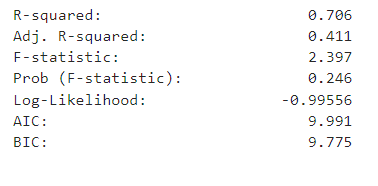

 Para Avaliarmos a significância do modelo precisamos verificar valores como F-Statistic e Prob(F-statistic)
 
 O F-statistic é calculada como a razão entre a variação explicada pelo modelo (variação entre as médias dos grupos) e a variação não explicada (variação dentro dos grupos). Temos um valor de F-statistic de "2.397", o que sugere que o modelo não é extremamente poderoso na distinção da variabilidade da variável dependente.

Para a Prob (F-statistic) ou p-valor com um valor de 0.246, isso significa que há uma chance de 24.6% de observar uma estatística F tão grande quanto ou maior do que a observada, caso a hipótese nula seja verdadeira (a hipótese nula afirma que o modelo não tem capacidade explicativa sobre a variável dependente). Tradicionalmente, um p-valor abaixo de 0.05 é considerado significativo, o que não é o caso aqui. Portanto, você não tem evidência suficiente para rejeitar a hipótese nula e pode concluir que o modelo como um todo não é estatisticamente significativo.

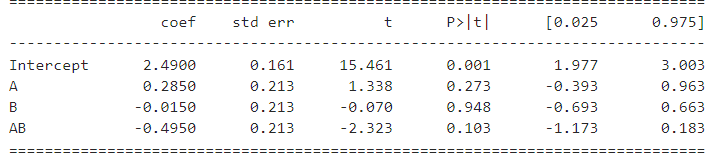

Vamos avaliar a significancia dos coeficientes dos valores, iremos fazer essa analise se baseando pelo P > |T|, um valor de p menor que 0,05 indica que não existe que a variavel é estatisticamente significativa, um valor maior podemos afirmar que  não há evidências suficientes para afirmar que a variavel é significativa

Como pode ser visto apenas a constante (Interpect) é significativo para este modelo.

Intercepto: O intervalo de confiança vai de 1.977 a 3.003, o que não inclui zero, reforçando que é significativo

A: O intervalo de -0.393 a 0.963 inclui zero, o que está alinhado com o valor-p não significativ
.
B: O intervalo de -0.693 a 0.663 também inclui zero, confirmando a não significânc

.
AB: O intervalo de -1.173 a 0.183 inclui zero, mas está mais próximo de excluir zero do que os intervalos de A  B.

In [22]:
print("ANOVA dos coeficientes do modelo:")
sm.stats.anova_lm(modelo_umidade, typ=2)

ANOVA dos coeficientes do modelo:


,sum_sq,df,F,PR(>F)
A,0.3249,1.0,1.789425,0.273364
B,0.0009,1.0,0.004957,0.948302
AB,0.9801,1.0,5.398017,0.102768
Residual,0.5447,3.0,NaN,NaN


A: Não é estatisticamente significativo no modelo (p-valor = 0.273364), o que significa que as mudanças em A não estão relacionadas a mudanças significativas na variável dependente.

B: Também não é significativo (p-valor = 0.948302), indicando que B não tem uma relação significativa com a variável dependente.

AB (Interação): Não é significativo (p-valor = 0.102768), o que sugere que não há uma interação significativa entre A e B no que diz respeito à variável dependente.